# Let Your Models Feature Select for You

In [1]:
import random

import numpy.random as npr
import numpy as np
from sklearn.datasets import load_boston
from sklearn.feature_selection import f_regression, RFECV
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn

random.seed(0)

%matplotlib inline

In [2]:
X, y = load_boston(return_X_y = True)

## Boston Data

```
7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's
```

In [3]:
X.shape, y.shape

((506, 13), (506,))

## Add a whole bunch of useless features

In [4]:
noise = npr.normal(size=(506, 1000),)
noisy_X = np.hstack([X, noise])

In [5]:
train_X, test_X, train_y, test_y = split = train_test_split(noisy_X, y, test_size = 0.25)

## Recursive Feature Elimination

In [6]:
estimator = LinearRegression(normalize=True)
rfe = RFECV(estimator, verbose = 1, scoring = 'neg_mean_squared_error')
rfe.fit_transform(train_X, train_y)

Fitting estimator with 1013 features.
Fitting estimator with 1012 features.
Fitting estimator with 1011 features.
Fitting estimator with 1010 features.
Fitting estimator with 1009 features.
Fitting estimator with 1008 features.
Fitting estimator with 1007 features.
Fitting estimator with 1006 features.
Fitting estimator with 1005 features.
Fitting estimator with 1004 features.
Fitting estimator with 1003 features.
Fitting estimator with 1002 features.
Fitting estimator with 1001 features.
Fitting estimator with 1000 features.
Fitting estimator with 999 features.
Fitting estimator with 998 features.
Fitting estimator with 997 features.
Fitting estimator with 996 features.
Fitting estimator with 995 features.
Fitting estimator with 994 features.
Fitting estimator with 993 features.
Fitting estimator with 992 features.
Fitting estimator with 991 features.
Fitting estimator with 990 features.
Fitting estimator with 989 features.
Fitting estimator with 988 features.
Fitting estimator with 9

Fitting estimator with 790 features.
Fitting estimator with 789 features.
Fitting estimator with 788 features.
Fitting estimator with 787 features.
Fitting estimator with 786 features.
Fitting estimator with 785 features.
Fitting estimator with 784 features.
Fitting estimator with 783 features.
Fitting estimator with 782 features.
Fitting estimator with 781 features.
Fitting estimator with 780 features.
Fitting estimator with 779 features.
Fitting estimator with 778 features.
Fitting estimator with 777 features.
Fitting estimator with 776 features.
Fitting estimator with 775 features.
Fitting estimator with 774 features.
Fitting estimator with 773 features.
Fitting estimator with 772 features.
Fitting estimator with 771 features.
Fitting estimator with 770 features.
Fitting estimator with 769 features.
Fitting estimator with 768 features.
Fitting estimator with 767 features.
Fitting estimator with 766 features.
Fitting estimator with 765 features.
Fitting estimator with 764 features.
F

Fitting estimator with 565 features.
Fitting estimator with 564 features.
Fitting estimator with 563 features.
Fitting estimator with 562 features.
Fitting estimator with 561 features.
Fitting estimator with 560 features.
Fitting estimator with 559 features.
Fitting estimator with 558 features.
Fitting estimator with 557 features.
Fitting estimator with 556 features.
Fitting estimator with 555 features.
Fitting estimator with 554 features.
Fitting estimator with 553 features.
Fitting estimator with 552 features.
Fitting estimator with 551 features.
Fitting estimator with 550 features.
Fitting estimator with 549 features.
Fitting estimator with 548 features.
Fitting estimator with 547 features.
Fitting estimator with 546 features.
Fitting estimator with 545 features.
Fitting estimator with 544 features.
Fitting estimator with 543 features.
Fitting estimator with 542 features.
Fitting estimator with 541 features.
Fitting estimator with 540 features.
Fitting estimator with 539 features.
F

Fitting estimator with 341 features.
Fitting estimator with 340 features.
Fitting estimator with 339 features.
Fitting estimator with 338 features.
Fitting estimator with 337 features.
Fitting estimator with 336 features.
Fitting estimator with 335 features.
Fitting estimator with 334 features.
Fitting estimator with 333 features.
Fitting estimator with 332 features.
Fitting estimator with 331 features.
Fitting estimator with 330 features.
Fitting estimator with 329 features.
Fitting estimator with 328 features.
Fitting estimator with 327 features.
Fitting estimator with 326 features.
Fitting estimator with 325 features.
Fitting estimator with 324 features.
Fitting estimator with 323 features.
Fitting estimator with 322 features.
Fitting estimator with 321 features.
Fitting estimator with 320 features.
Fitting estimator with 319 features.
Fitting estimator with 318 features.
Fitting estimator with 317 features.
Fitting estimator with 316 features.
Fitting estimator with 315 features.
F

Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estim

Fitting estimator with 902 features.
Fitting estimator with 901 features.
Fitting estimator with 900 features.
Fitting estimator with 899 features.
Fitting estimator with 898 features.
Fitting estimator with 897 features.
Fitting estimator with 896 features.
Fitting estimator with 895 features.
Fitting estimator with 894 features.
Fitting estimator with 893 features.
Fitting estimator with 892 features.
Fitting estimator with 891 features.
Fitting estimator with 890 features.
Fitting estimator with 889 features.
Fitting estimator with 888 features.
Fitting estimator with 887 features.
Fitting estimator with 886 features.
Fitting estimator with 885 features.
Fitting estimator with 884 features.
Fitting estimator with 883 features.
Fitting estimator with 882 features.
Fitting estimator with 881 features.
Fitting estimator with 880 features.
Fitting estimator with 879 features.
Fitting estimator with 878 features.
Fitting estimator with 877 features.
Fitting estimator with 876 features.
F

Fitting estimator with 678 features.
Fitting estimator with 677 features.
Fitting estimator with 676 features.
Fitting estimator with 675 features.
Fitting estimator with 674 features.
Fitting estimator with 673 features.
Fitting estimator with 672 features.
Fitting estimator with 671 features.
Fitting estimator with 670 features.
Fitting estimator with 669 features.
Fitting estimator with 668 features.
Fitting estimator with 667 features.
Fitting estimator with 666 features.
Fitting estimator with 665 features.
Fitting estimator with 664 features.
Fitting estimator with 663 features.
Fitting estimator with 662 features.
Fitting estimator with 661 features.
Fitting estimator with 660 features.
Fitting estimator with 659 features.
Fitting estimator with 658 features.
Fitting estimator with 657 features.
Fitting estimator with 656 features.
Fitting estimator with 655 features.
Fitting estimator with 654 features.
Fitting estimator with 653 features.
Fitting estimator with 652 features.
F

Fitting estimator with 456 features.
Fitting estimator with 455 features.
Fitting estimator with 454 features.
Fitting estimator with 453 features.
Fitting estimator with 452 features.
Fitting estimator with 451 features.
Fitting estimator with 450 features.
Fitting estimator with 449 features.
Fitting estimator with 448 features.
Fitting estimator with 447 features.
Fitting estimator with 446 features.
Fitting estimator with 445 features.
Fitting estimator with 444 features.
Fitting estimator with 443 features.
Fitting estimator with 442 features.
Fitting estimator with 441 features.
Fitting estimator with 440 features.
Fitting estimator with 439 features.
Fitting estimator with 438 features.
Fitting estimator with 437 features.
Fitting estimator with 436 features.
Fitting estimator with 435 features.
Fitting estimator with 434 features.
Fitting estimator with 433 features.
Fitting estimator with 432 features.
Fitting estimator with 431 features.
Fitting estimator with 430 features.
F

Fitting estimator with 234 features.
Fitting estimator with 233 features.
Fitting estimator with 232 features.
Fitting estimator with 231 features.
Fitting estimator with 230 features.
Fitting estimator with 229 features.
Fitting estimator with 228 features.
Fitting estimator with 227 features.
Fitting estimator with 226 features.
Fitting estimator with 225 features.
Fitting estimator with 224 features.
Fitting estimator with 223 features.
Fitting estimator with 222 features.
Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
F

Fitting estimator with 1013 features.
Fitting estimator with 1012 features.
Fitting estimator with 1011 features.
Fitting estimator with 1010 features.
Fitting estimator with 1009 features.
Fitting estimator with 1008 features.
Fitting estimator with 1007 features.
Fitting estimator with 1006 features.
Fitting estimator with 1005 features.
Fitting estimator with 1004 features.
Fitting estimator with 1003 features.
Fitting estimator with 1002 features.
Fitting estimator with 1001 features.
Fitting estimator with 1000 features.
Fitting estimator with 999 features.
Fitting estimator with 998 features.
Fitting estimator with 997 features.
Fitting estimator with 996 features.
Fitting estimator with 995 features.
Fitting estimator with 994 features.
Fitting estimator with 993 features.
Fitting estimator with 992 features.
Fitting estimator with 991 features.
Fitting estimator with 990 features.
Fitting estimator with 989 features.
Fitting estimator with 988 features.
Fitting estimator with 9

Fitting estimator with 788 features.
Fitting estimator with 787 features.
Fitting estimator with 786 features.
Fitting estimator with 785 features.
Fitting estimator with 784 features.
Fitting estimator with 783 features.
Fitting estimator with 782 features.
Fitting estimator with 781 features.
Fitting estimator with 780 features.
Fitting estimator with 779 features.
Fitting estimator with 778 features.
Fitting estimator with 777 features.
Fitting estimator with 776 features.
Fitting estimator with 775 features.
Fitting estimator with 774 features.
Fitting estimator with 773 features.
Fitting estimator with 772 features.
Fitting estimator with 771 features.
Fitting estimator with 770 features.
Fitting estimator with 769 features.
Fitting estimator with 768 features.
Fitting estimator with 767 features.
Fitting estimator with 766 features.
Fitting estimator with 765 features.
Fitting estimator with 764 features.
Fitting estimator with 763 features.
Fitting estimator with 762 features.
F

Fitting estimator with 567 features.
Fitting estimator with 566 features.
Fitting estimator with 565 features.
Fitting estimator with 564 features.
Fitting estimator with 563 features.
Fitting estimator with 562 features.
Fitting estimator with 561 features.
Fitting estimator with 560 features.
Fitting estimator with 559 features.
Fitting estimator with 558 features.
Fitting estimator with 557 features.
Fitting estimator with 556 features.
Fitting estimator with 555 features.
Fitting estimator with 554 features.
Fitting estimator with 553 features.
Fitting estimator with 552 features.
Fitting estimator with 551 features.
Fitting estimator with 550 features.
Fitting estimator with 549 features.
Fitting estimator with 548 features.
Fitting estimator with 547 features.
Fitting estimator with 546 features.
Fitting estimator with 545 features.
Fitting estimator with 544 features.
Fitting estimator with 543 features.
Fitting estimator with 542 features.
Fitting estimator with 541 features.
F

Fitting estimator with 344 features.
Fitting estimator with 343 features.
Fitting estimator with 342 features.
Fitting estimator with 341 features.
Fitting estimator with 340 features.
Fitting estimator with 339 features.
Fitting estimator with 338 features.
Fitting estimator with 337 features.
Fitting estimator with 336 features.
Fitting estimator with 335 features.
Fitting estimator with 334 features.
Fitting estimator with 333 features.
Fitting estimator with 332 features.
Fitting estimator with 331 features.
Fitting estimator with 330 features.
Fitting estimator with 329 features.
Fitting estimator with 328 features.
Fitting estimator with 327 features.
Fitting estimator with 326 features.
Fitting estimator with 325 features.
Fitting estimator with 324 features.
Fitting estimator with 323 features.
Fitting estimator with 322 features.
Fitting estimator with 321 features.
Fitting estimator with 320 features.
Fitting estimator with 319 features.
Fitting estimator with 318 features.
F

Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting e

array([[  0.    ,   0.713 ,   6.081 ,  20.2   ],
       [  0.    ,   0.624 ,   6.431 ,  21.2   ],
       [  0.    ,   0.4161,   7.853 ,  14.7   ],
       ..., 
       [  0.    ,   0.693 ,   5.453 ,  20.2   ],
       [  0.    ,   0.442 ,   6.014 ,  18.8   ],
       [  0.    ,   0.52  ,   5.836 ,  20.9   ]])

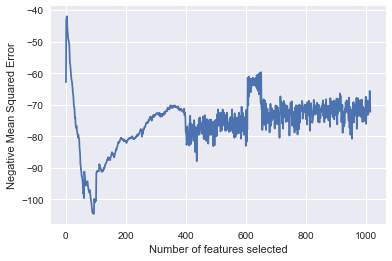

In [7]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Negative Mean Squared Error")
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()

In [8]:
rfe.n_features_

4

In [16]:
rfe.support_[:13].astype(int)

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [10]:
rfe.estimator_.coef_

array([  4.49175027, -20.72905604,   6.5214174 ,  -1.20931796])

In [11]:
lasso = LassoCV(normalize=True)
lasso.fit(train_X, train_y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [12]:
len(lasso.coef_.nonzero()[0])

5

In [17]:
lasso.coef_[:13]

array([ -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
         1.85441997e-01,  -0.00000000e+00,   3.40154167e+00,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -6.78338909e-01,   1.74032119e-03,
        -5.71170594e-01])

In [18]:
lasso.score(test_X, test_y)

0.60582426589170679

In [19]:
rfe.score(test_X, test_y)

0.5910364827279444

## Takeaways